In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# 1. Data Cleaning and Manipulation


### 1. Cleaning Data - Fixing Columns

#### 1.1.1 Data Loading and checking the Number of rows and Columns in the dataset

In [5]:
loan_df = pd.read_csv("loan.csv")
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [6]:
# Checking number of rows and columns in dataset
loan_df.shape

(39717, 111)

#### 1.1.2 Checking the total number of columns having NA value and Removing it from dataset

In [8]:
#checking the Null columns
loan_df.isnull().sum().sort_values(ascending=False)

verification_status_joint    39717
annual_inc_joint             39717
mo_sin_old_rev_tl_op         39717
mo_sin_old_il_acct           39717
bc_util                      39717
                             ...  
delinq_amnt                      0
policy_code                      0
earliest_cr_line                 0
delinq_2yrs                      0
id                               0
Length: 111, dtype: int64

In [9]:
#Calculationg the number of columns having the NA values

cols_dropped = 0
for col in sorted(loan_df.columns):
    if loan_df[col].isna().sum() == loan_df.shape[0]:
        cols_dropped = cols_dropped + 1


print(f'Number of columns having NA value = {cols_dropped}')    
print(f'Percentage of dropped columns = {round(cols_dropped / loan_df.shape[1] * 100, 2)}%')

Number of columns having NA value = 54
Percentage of dropped columns = 48.65%


In [10]:
# Dropping the NA columns from the Dataset

loan_df.dropna(axis = 1, how = 'all', inplace = True)
loan_df.shape

(39717, 57)

#### 1.1.3 Remove columns with same value  for all rows.


In [12]:
#calulating total number of columns having single unique values

single_unique_columns_list = []
count=0
for i in loan_df.columns:
    # Check if unique value count is 1
    if loan_df[i].nunique() == 1:
        count=count+1
        single_unique_columns_list.append(i)
        
print(f'Number of columns having single unique values: {count}')
print(single_unique_columns_list)

Number of columns having single unique values: 9
['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens']


In [13]:
# Removing the columns having Single Unique value

loan_df.drop(single_unique_columns_list, axis = 1, inplace = True)

In [14]:
loan_df.shape

(39717, 48)

#### 1.1.4 Remove columns with high percentage of missing values


In [16]:
# Listing columns which have null values, rounding the percentage to 2 Decimal points.

null_percent = round(loan_df.isnull().sum()/len(loan_df),2)
null_percent[null_percent > 0].sort_values(ascending=False)

next_pymnt_d              0.97
mths_since_last_record    0.93
mths_since_last_delinq    0.65
desc                      0.33
emp_title                 0.06
emp_length                0.03
pub_rec_bankruptcies      0.02
dtype: float64

##### Following columns having the null percentage more than 60%, and if these columns imputed, this will skew the analysis
    
    
    
next_pymnt_d              0.97
mths_since_last_record    0.93
mths_since_last_delinq    0.65


In [18]:
# Dropping the cloumns having more than 60% null value
loan_df.drop(null_percent[null_percent > .6].index,axis=1,inplace=True)
loan_df.shape

(39717, 45)

#### 1.1.5 Remove colums with unique values for all rows
    As Unique value columns do not assist with analysis as these do not form any pattern.


In [20]:
# Finding columns with all unique values.
unique_val_col = loan_df.columns[loan_df.nunique() == len(loan_df)]
unique_val_col

Index(['id', 'member_id', 'url'], dtype='object')

In [21]:
#Dropping columns with all unique values
loan_df.drop(unique_val_col,axis=1,inplace=True)
loan_df.shape

(39717, 42)

#### 1.1.6. Remvoing unwanted categorical columns.

In [23]:
# Listing all the remaing columns.
loan_df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'desc', 'purpose', 'title', 'zip_code', 'addr_state',
       'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'pub_rec_bankruptcies'],
      dtype='object')

In [24]:
#Dropping the identified columns
text_columns = ['emp_title','desc','title','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d']
print(text_columns)
loan_df.drop(text_columns,axis=1,inplace=True)
loan_df.shape

['emp_title', 'desc', 'title', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d']


(39717, 27)

#### 1.1.7 Fixing Data Types for the columns
We are now left with 27 columns. Let's list all the categorical columns and see if some of these have numerical values.


In [26]:
#Listing Categorical columns
loan_df.dtypes[loan_df.dtypes == 'object']

term                   object
int_rate               object
grade                  object
sub_grade              object
emp_length             object
home_ownership         object
verification_status    object
issue_d                object
loan_status            object
purpose                object
zip_code               object
addr_state             object
earliest_cr_line       object
revol_util             object
dtype: object

In [27]:
#Looking at data in the categorical columns
loan_df[loan_df.columns[loan_df.dtypes == 'object']]

,term,int_rate,grade,sub_grade,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,earliest_cr_line,revol_util
0,36 months,10.65%,B,B2,10+ years,RENT,Verified,Dec-11,Fully Paid,credit_card,860xx,AZ,Jan-85,83.70%
1,60 months,15.27%,C,C4,< 1 year,RENT,Source Verified,Dec-11,Charged Off,car,309xx,GA,Apr-99,9.40%
2,36 months,15.96%,C,C5,10+ years,RENT,Not Verified,Dec-11,Fully Paid,small_business,606xx,IL,Nov-01,98.50%
3,36 months,13.49%,C,C1,10+ years,RENT,Source Verified,Dec-11,Fully Paid,other,917xx,CA,Feb-96,21%
4,60 months,12.69%,B,B5,1 year,RENT,Source Verified,Dec-11,Current,other,972xx,OR,Jan-96,53.90%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,36 months,8.07%,A,A4,4 years,MORTGAGE,Not Verified,Jul-07,Fully Paid,home_improvement,802xx,CO,Nov-90,13.10%
39713,36 months,10.28%,C,C1,3 years,RENT,Not Verified,Jul-07,Fully Paid,credit_card,274xx,NC,Dec-86,26.90%
39714,36 months,8.07%,A,A4,< 1 year,MORTGAGE,Not Verified,Jul-07,Fully Paid,debt_consolidation,017xx,MA,Oct-98,19.40%
39715,36 months,7.43%,A,A2,< 1 year,MORTGAGE,Not Verified,Jul-07,Fully Paid,other,208xx,MD,Nov-88,0.70%


####
In the categorical columns, below columns hold numberical data and can be cleaned and converted.

int_rate
revol_util

In [29]:
# Confirming that all the values in the int_rate column contains % at the end.
loan_df[loan_df.int_rate.str.contains('%')].int_rate.shape[0]

39717

In [30]:
#the count of rows with % is equal to the number of rows.
#Removing the % from the end of the string and coverting to float.
loan_df.int_rate = loan_df.int_rate.apply(lambda rate : (rate.replace('%',''))).astype('float')

In [31]:
# Checking the datatype for int_rate
loan_df.int_rate.dtype

dtype('float64')

In [32]:
#Removing the % from the end of the string and coverting to float.
loan_df.revol_util = loan_df.revol_util.str.rstrip('%').astype('float')

In [33]:
# Checking the datatype for revol_util
loan_df.revol_util.dtype

dtype('float64')

#### 1.1.8 Extracting additional columns

issue_d and earliest_cr_line stores the date time in MMM-YY format. We'll extract following columns from these

issue_d_m = the month when the loan was funde
.
issue_d_y = the year in which the loan was fund
d.
earliest_cr_line_m = month of the earliest credit enqu
ry.
earliest_cr_line_y = year of the earliest credit enquiry.

In [35]:
loan_df['issue_d_y'] = pd.to_datetime(loan_df.issue_d, format='%b-%y').dt.year
loan_df['issue_d_m'] = pd.to_datetime(loan_df.issue_d, format='%b-%y').dt.month
loan_df['earliest_cr_line_m'] = pd.to_datetime(loan_df.earliest_cr_line, format='%b-%y').dt.month
loan_df['earliest_cr_line_y'] = pd.to_datetime(loan_df.earliest_cr_line, format='%b-%y').dt.year
loan_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,issue_d_y,issue_d_m,earliest_cr_line_m,earliest_cr_line_y
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,...,3,0,13648,83.7,9,0.0,2011,12,1,1985
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,...,3,0,1687,9.4,4,0.0,2011,12,4,1999
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,...,2,0,2956,98.5,10,0.0,2011,12,11,2001
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,...,10,0,5598,21.0,37,0.0,2011,12,2,1996
4,3000,3000,3000.0,60 months,12.69,67.79,B,B5,1 year,RENT,...,15,0,27783,53.9,38,0.0,2011,12,1,1996


### 1.2 Cleaning Data - Fixing Rows

#### 1.2.1 Fixing Duplicate Rows.

In [38]:
#list of all the duplicated rows
loan_df[loan_df.duplicated()]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,issue_d_y,issue_d_m,earliest_cr_line_m,earliest_cr_line_y


There are no duplicate rows in the data.


### 1.2.2 - Removing Null values from Rows.

In [41]:
#Listing the columns which still have null values.
loan_df.columns[loan_df.isna().sum() > 0]

Index(['emp_length', 'revol_util', 'pub_rec_bankruptcies'], dtype='object')

In [42]:
#List the null values in each colum along with total null values in the data and percentage of null values against the dataset.
print('Number of null values in each column : ')
missing_val = loan_df[loan_df.columns[loan_df.isna().sum() > 0]].isna().sum()
print(missing_val)
print("Total Number of missing values across all 3 colums : ", missing_val.sum())
print("% of missing values wrt total number of rows: " , round(missing_val.sum()/len(loan_df)*100,2))

Number of null values in each column : 
emp_length              1075
revol_util                50
pub_rec_bankruptcies     697
dtype: int64
Total Number of missing values across all 3 colums :  1822
% of missing values wrt total number of rows:  4.59


In [43]:
#Dropping null values from columns and listing the sum of null values in all the columns.
loan_df = loan_df[(loan_df.emp_length.notna()) & (loan_df.revol_util.notna()) & (loan_df.pub_rec_bankruptcies.notna())]
loan_df.isna().sum()

loan_amnt               0
funded_amnt             0
funded_amnt_inv         0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
zip_code                0
addr_state              0
dti                     0
delinq_2yrs             0
earliest_cr_line        0
inq_last_6mths          0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
pub_rec_bankruptcies    0
issue_d_y               0
issue_d_m               0
earliest_cr_line_m      0
earliest_cr_line_y      0
dtype: int64

#### 1.2.3 - Fixing Discrpencies in values

In [45]:
#List catagorical dataframe columns
loan_df[loan_df.columns[loan_df.dtypes == 'object']]

,term,grade,sub_grade,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,earliest_cr_line
0,36 months,B,B2,10+ years,RENT,Verified,Dec-11,Fully Paid,credit_card,860xx,AZ,Jan-85
1,60 months,C,C4,< 1 year,RENT,Source Verified,Dec-11,Charged Off,car,309xx,GA,Apr-99
2,36 months,C,C5,10+ years,RENT,Not Verified,Dec-11,Fully Paid,small_business,606xx,IL,Nov-01
3,36 months,C,C1,10+ years,RENT,Source Verified,Dec-11,Fully Paid,other,917xx,CA,Feb-96
4,60 months,B,B5,1 year,RENT,Source Verified,Dec-11,Current,other,972xx,OR,Jan-96
...,...,...,...,...,...,...,...,...,...,...,...,...
39562,36 months,C,C1,1 year,RENT,Not Verified,Nov-07,Fully Paid,debt_consolidation,226xx,VA,Mar-00
39573,36 months,C,C2,3 years,MORTGAGE,Not Verified,Nov-07,Fully Paid,debt_consolidation,853xx,AZ,Feb-89
39623,36 months,D,D3,8 years,MORTGAGE,Not Verified,Oct-07,Charged Off,debt_consolidation,207xx,MD,Aug-97
39666,36 months,C,C4,2 years,MORTGAGE,Not Verified,Aug-07,Charged Off,debt_consolidation,201xx,VA,Nov-92


In [46]:
#Checking the unique value counts across categorical columns.
print(loan_df.term.value_counts())
print(loan_df.grade.value_counts())
print(loan_df.home_ownership.value_counts())
print(loan_df.verification_status.value_counts())
print(loan_df.loan_status.value_counts())

term
36 months    27546
60 months    10352
Name: count, dtype: int64
grade
B    11476
A     9553
C     7731
D     5068
E     2749
F     1010
G      311
Name: count, dtype: int64
home_ownership
RENT        18077
MORTGAGE    16951
OWN          2774
OTHER          96
Name: count, dtype: int64
verification_status
Not Verified       15774
Verified           12344
Source Verified     9780
Name: count, dtype: int64
loan_status
Fully Paid     31534
Charged Off     5266
Current         1098
Name: count, dtype: int64


In [47]:
#updating the verification_status column values.
loan_df.loc[loan_df.verification_status == 'Source Verified','verification_status'] = 'Verified'
loan_df.verification_status.value_counts()

verification_status
Verified        22124
Not Verified    15774
Name: count, dtype: int64

In [48]:
#Updating the emp_length column values
emp_map: dict = {
    '< 1 year': 0, '1 year': 1, '2 years': 2, '3 years': 3,
    '4 years': 4, '5 years': 5, '6 years': 6, '7 years': 7,
    '8 years': 8, '9 years': 9, '10+ years': 10
}

# Use the map function to replace values in the 'emp_length' column
loan_df.emp_length = loan_df.emp_length.map(emp_map)
loan_df.emp_length.value_counts()

emp_length
10    8759
0     4404
2     4299
3     4030
4     3384
5     3245
1     3142
6     2194
7     1748
8     1452
9     1241
Name: count, dtype: int64

In [49]:
#Updating term column.
loan_df.term = loan_df.term.apply(lambda term: int(term[:3]))
loan_df.term.value_counts()

term
36    27546
60    10352
Name: count, dtype: int64

In [50]:
#Calculating the loan status unique values.
loan_df.loan_status.value_counts()

loan_status
Fully Paid     31534
Charged Off     5266
Current         1098
Name: count, dtype: int64

In [51]:
#Finding the percentage of all loan types.
print('Fully Paid Loan % is ' , round(loan_df[loan_df.loan_status == 'Fully Paid'].shape[0]/loan_df.shape[0]*100,2))
print('Charged Off Loan % is ' , round(loan_df[loan_df.loan_status == 'Charged Off'].shape[0]/loan_df.shape[0]*100,2))
print('Current Loan % is ' , round(loan_df[loan_df.loan_status == 'Current'].shape[0]/loan_df.shape[0]*100,2))

Fully Paid Loan % is  83.21
Charged Off Loan % is  13.9
Current Loan % is  2.9


In [52]:
#Removing the loans with Current and Fully Paid Status as we need to analyze factors leading to Charge Offs.

loan_df = loan_df[loan_df.loan_status == 'Charged Off']
loan_df.shape

(5266, 31)

### 1.3 Outlier Treatment

In [54]:
# List all quantative variables.
loan_df.columns[loan_df.dtypes != 'object']

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'emp_length', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'pub_rec_bankruptcies', 'issue_d_y', 'issue_d_m',
       'earliest_cr_line_m', 'earliest_cr_line_y'],
      dtype='object')

#### 1.3.1 Outliers in Annual Income

<Axes: ylabel='annual_inc'>

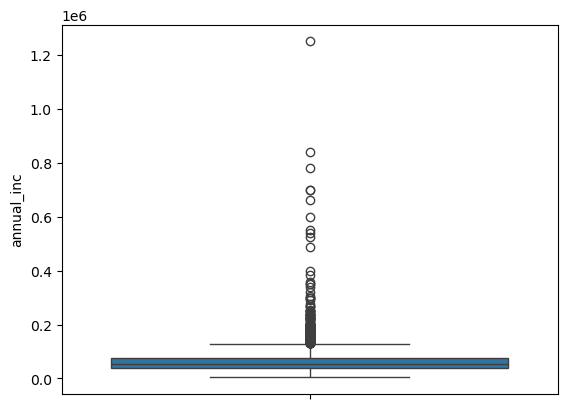

In [56]:
#plotting annual income
sns.boxplot(y=loan_df.annual_inc)

There are clear outliers in the data. let's look at the perctile data to identify major outliers.


In [58]:
loan_df.annual_inc.quantile([.1,.2,.3,.4,.5,.6,.7,.8,.9,.95,.96,.97,.98,.99])

0.10     28000.0
0.20     35004.0
0.30     40800.0
0.40     48000.0
0.50     54000.0
0.60     60000.0
0.70     70000.0
0.80     81996.0
0.90    105000.0
0.95    130000.0
0.96    140000.0
0.97    150000.0
0.98    174934.8
0.99    204400.0
Name: annual_inc, dtype: float64

There is a big jump in annual_inc between 95 and 99. lets drop the values above 95th percentile.

<Axes: ylabel='annual_inc'>

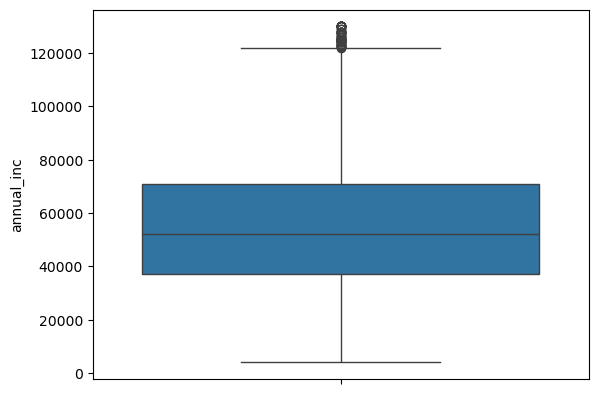

In [60]:
#Dropping the top 5 percentile values and plotting the annual_inc again
loan_df = loan_df[loan_df.annual_inc <= loan_df.annual_inc.quantile(.95)]
sns.boxplot(y=loan_df.annual_inc)

In [61]:
loan_df.annual_inc.describe()

count      5008.000000
mean      56307.131873
std       25225.204687
min        4080.000000
25%       37000.000000
50%       52000.000000
75%       71000.000000
max      130000.000000
Name: annual_inc, dtype: float64

### 1.3.2 Outliers in dti

<Axes: ylabel='dti'>

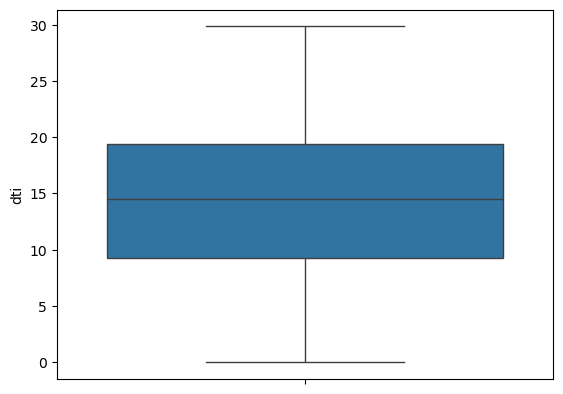

In [63]:
sns.boxplot(y=loan_df.dti)

### 1.3.3 Outliers in loan amount



<Axes: ylabel='loan_amnt'>

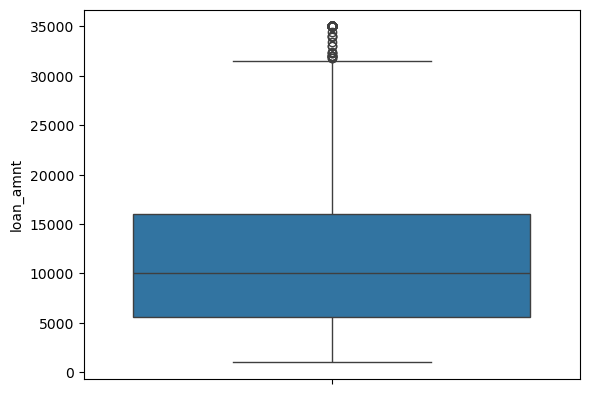

In [65]:
sns.boxplot(y=loan_df.loan_amnt)

In [66]:
#looking at loan_amnt distribution
print(loan_df.loan_amnt.describe())
loan_df.loan_amnt.quantile([.1,.2,.3,.4,.5,.6,.7,.8,.9,.95,.99])

count     5008.000000
mean     11903.614217
std       7876.489918
min       1000.000000
25%       5600.000000
50%      10000.000000
75%      16000.000000
max      35000.000000
Name: loan_amnt, dtype: float64


0.10     3250.0
0.20     5000.0
0.30     6300.0
0.40     8000.0
0.50    10000.0
0.60    12000.0
0.70    15000.0
0.80    18000.0
0.90    24000.0
0.95    25975.0
0.99    35000.0
Name: loan_amnt, dtype: float64

#### 1.3.4 Outliers in funded amount and funded amount by investors

<Axes: ylabel='funded_amnt'>

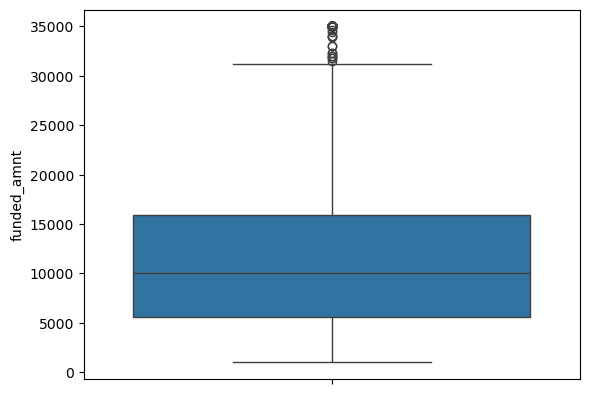

In [68]:
sns.boxplot(y=loan_df.funded_amnt)


In [69]:
#looking at funded_amnt distribution
print(loan_df.funded_amnt.describe())
loan_df.funded_amnt.quantile([.1,.2,.3,.4,.5,.6,.7,.8,.9,.95,.99])

count     5008.000000
mean     11563.663139
std       7553.709781
min       1000.000000
25%       5600.000000
50%      10000.000000
75%      15875.000000
max      35000.000000
Name: funded_amnt, dtype: float64


0.10     3250.0
0.20     5000.0
0.30     6100.0
0.40     8000.0
0.50    10000.0
0.60    12000.0
0.70    15000.0
0.80    17740.0
0.90    22000.0
0.95    25000.0
0.99    35000.0
Name: funded_amnt, dtype: float64

<Axes: ylabel='funded_amnt_inv'>

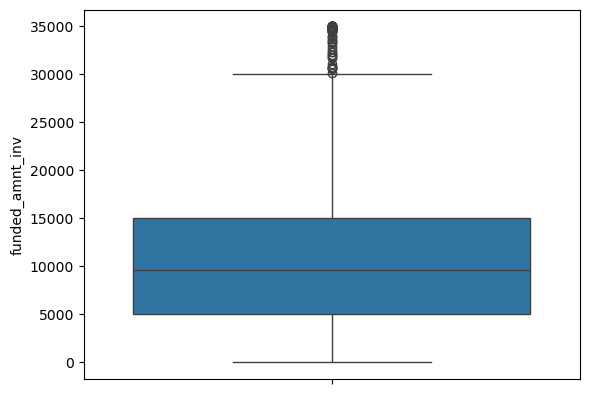

In [70]:
sns.boxplot(y=loan_df.funded_amnt_inv)

In [71]:
#looking at funded_amnt_inv distribution
print(loan_df.funded_amnt_inv.describe())
loan_df.funded_amnt_inv.quantile([.1,.2,.3,.4,.5,.6,.7,.8,.9,.95,.99])

count     5008.000000
mean     10884.695625
std       7408.972357
min          0.000000
25%       5000.000000
50%       9575.000000
75%      15000.000000
max      35000.000000
Name: funded_amnt_inv, dtype: float64


0.10     3000.000000
0.20     4600.000000
0.30     5950.000000
0.40     7500.000000
0.50     9575.000000
0.60    11518.328256
0.70    13991.074000
0.80    16425.000000
0.90    20975.000000
0.95    24950.000000
0.99    34950.000000
Name: funded_amnt_inv, dtype: float64

#### 1.3.5 Outliers in earliest_cr_line_y

<Axes: ylabel='earliest_cr_line_y'>

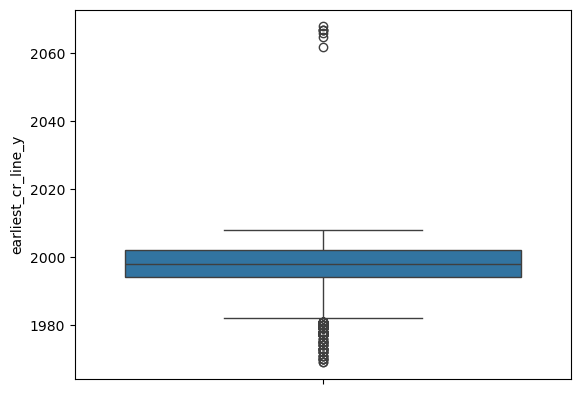

In [73]:
sns.boxplot(y=loan_df.earliest_cr_line_y)

<Axes: ylabel='earliest_cr_line_y'>

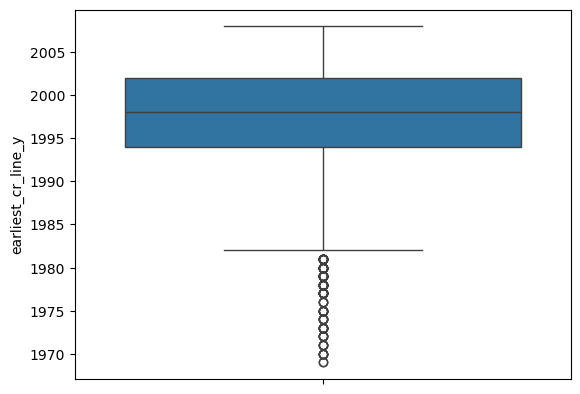

In [74]:
#Removing Upper bound outlier from earliest_cr_line_y
loan_df = loan_df[loan_df.earliest_cr_line_y < 2020]
sns.boxplot(y=loan_df.earliest_cr_line_y)

In [75]:
loan_df.shape

(5001, 31)

### 2. Data Analysis

As a part of data analysis, following analysis to be involved:
1. Univariant Analysis
2. Bivariant Analysis
3. Correlation Analysis

#### 2.1. Data Analysis Based in Univariant Analysis


#### 2.1.1 Ordered Categorical Variable Analysis

##### a. Analysis of Univariant Variable - Loan Grade

grade
B    25.31
C    24.30
D    19.94
E    12.42
A    10.74
F     5.48
G     1.82
Name: count, dtype: float64

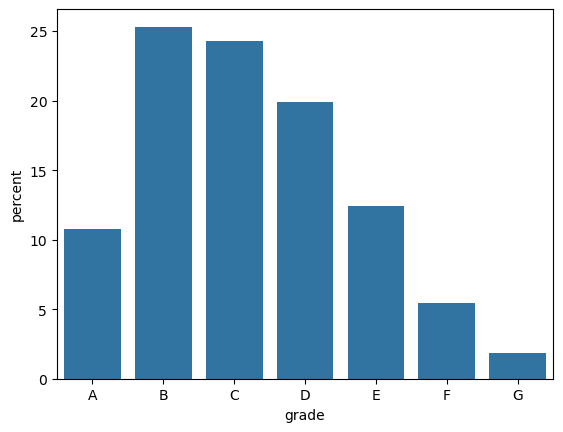

In [81]:
sns.countplot(x = 'grade', data = loan_df, order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'],stat='percent')
round(loan_df.grade.value_counts()/loan_df.shape[0]*100,2)

Following observations have been made:
1. Category B (25.31), followed by C (24.30) and D(19.94) have the highest number of charged off loans.
2. Category B and C together makes up for 49.61% of charged off loans.

##### b. Analysing the Univariat variable - Subgrade

In [84]:
#Fixing Subgrade as its having grade.
loan_df.sub_grade = pd.to_numeric(loan_df.sub_grade.apply(lambda x: x[-1]))

<Axes: xlabel='grade', ylabel='count'>

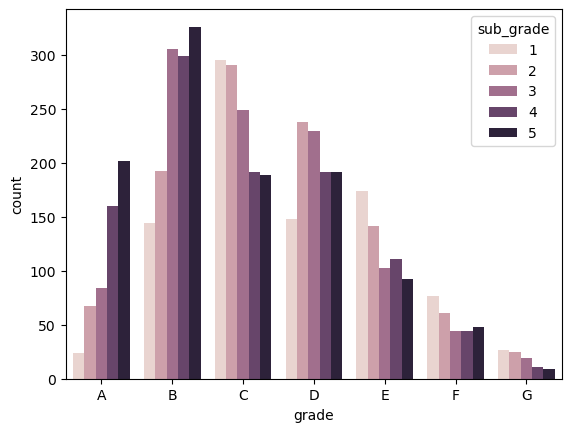

In [85]:
sns.countplot(x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] , hue = 'sub_grade',data = loan_df)


Ploting Subgrade is not showing any significant pattern
Only onservartion we have is following:

1. sub_grade 5 is dominating in category B folloed by 3 and 4.
2. sub_grade 1 has the most frequency in cat C followed by 2 and 3
3. subgrade 2 is winning in cat D followed by 3 and 4.

##### c. Analysing the Univariant variable - emp_length

In [88]:
#Finding Percentage Distribution of Emp_Length
print("%Percent distribution of emp_lenght\n",round(loan_df.emp_length.value_counts()/loan_df.shape[0]*100,2))

%Percent distribution of emp_lenght
 emp_length
10    24.44
0     11.58
2     10.58
3     10.50
5      8.64
1      8.58
4      8.50
6      5.68
7      4.92
8      3.66
9      2.94
Name: count, dtype: float64


<Axes: xlabel='emp_length', ylabel='count'>

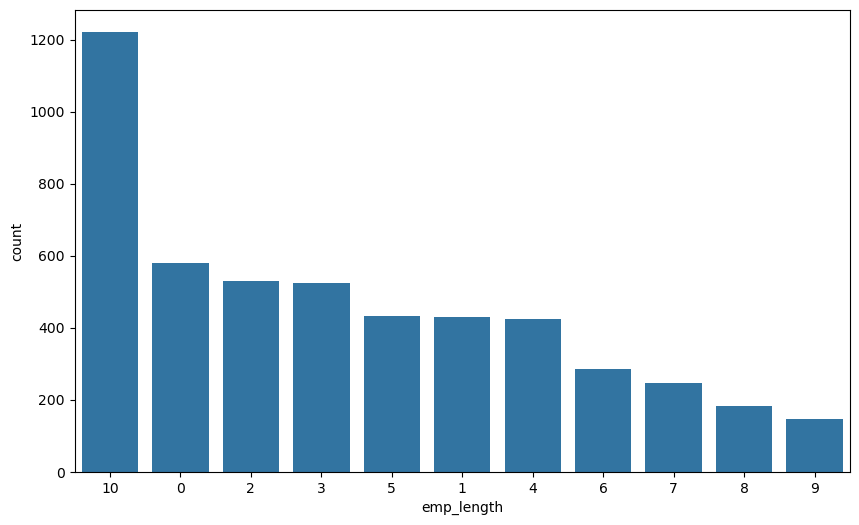

In [89]:
#### Plotting Graph for emp_length
fig,ax = plt.subplots(figsize=(10,6))
sns.countplot(data=loan_df,x='emp_length',order=loan_df.emp_length.value_counts().index)

Following observation have been made from emp_length
1. 10+ Years emp_length has the highest charged off loans at 24.44% followed by <1 Year at 11.58
2. There is a big jump(3% to 24%) in loan defaults from 9 Years to 10+ Year.

##### d. Analysis of Univariant Analysis - loan term

<Axes: xlabel='term', ylabel='percent'>

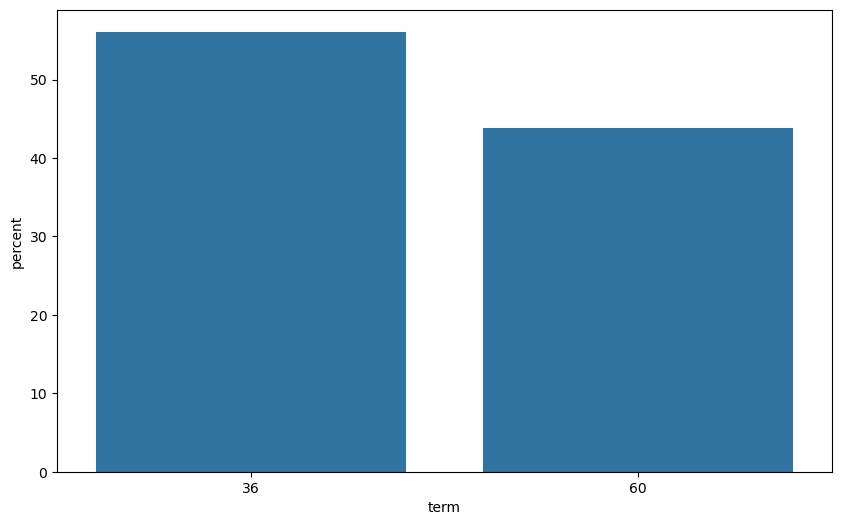

In [92]:
fig,ax = plt.subplots(figsize=(10,6))
sns.countplot(data=loan_df,x='term',order=loan_df.term.value_counts().index,stat='percent')

Following observations have been made from above plotting
1. More than 50% of defaulted loans are taken for lower term i.e. 36 Months


##### e. Analysis of Unvariant Analysis - loan issue year with loan issue month hue

<Axes: xlabel='issue_d_y', ylabel='count'>

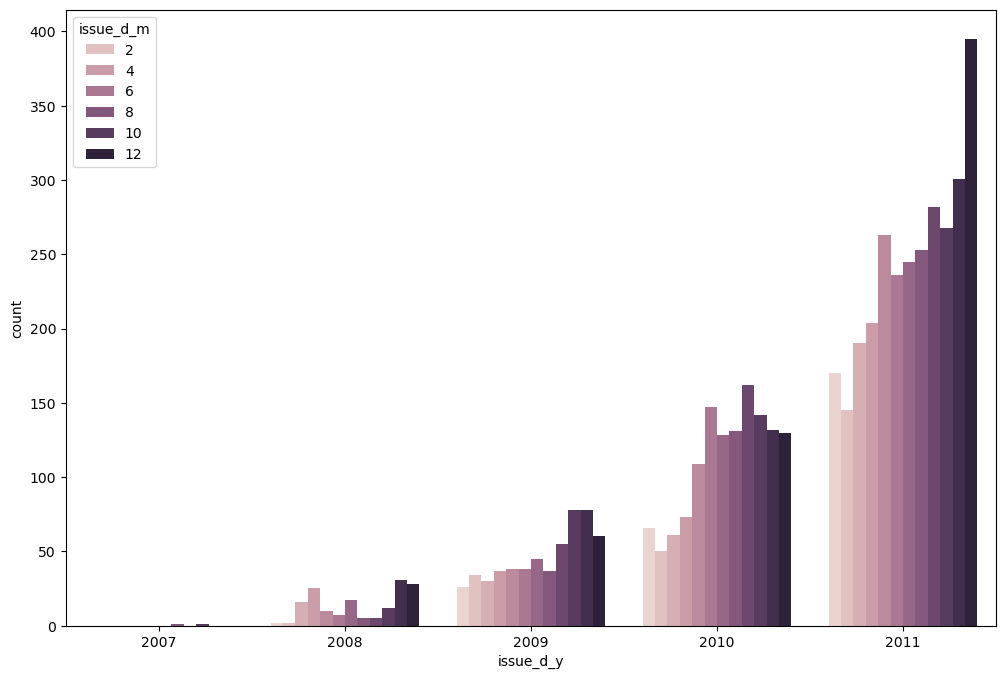

In [95]:
fig,ax = plt.subplots(figsize=(12,8))
sns.countplot(data=loan_df, x='issue_d_y', hue='issue_d_m')

Following observations have been found while plotting loan year and Loan month 
1. We see an upward trend in number of defaulted loans over the years.
2. Most of the defaulted loans tends to be approved around end of year, this co-incides with the holiday seasons.

##### f. Analysis of Univariant Analysis - earliest_cr_line_y

<Axes: xlabel='earliest_cr_line_y', ylabel='count'>

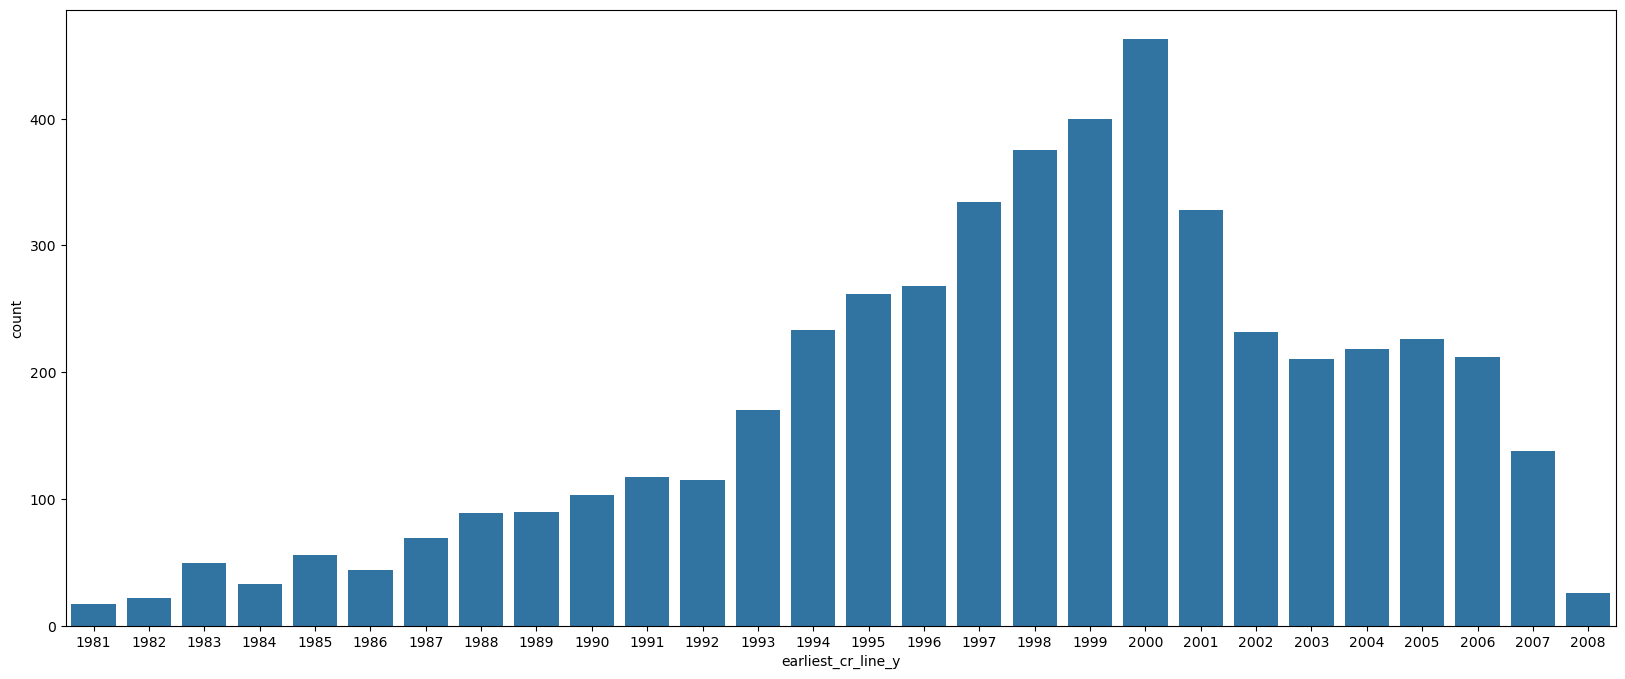

In [98]:
fig,ax = plt.subplots(figsize=(20,8))
sns.countplot(data=loan_df[loan_df.earliest_cr_line_y>1980], x='earliest_cr_line_y')

Following have been observed while plotting earliest_cr_line_y
1. From the above plot we can see that a long credit history doesn't necesarily means the ability or repayment.
2. We  can see that the charged off loans peaked for customers who started their credit in 2000 and is on a downward trend ever since.

#### 2.1.2 UnOrdered Categorical Variable Analysis


##### a. Analysis of Unordered Categorical Varaible - home ownership

<Axes: xlabel='home_ownership', ylabel='percent'>

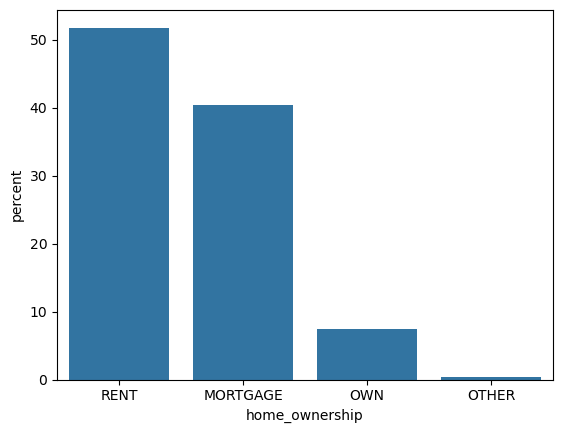

In [102]:
#Plotting home ownership
sns.countplot(data=loan_df,x='home_ownership',order=loan_df.home_ownership.value_counts().index,stat='percent')

Following analysis have been made:
1. Customers with Rented and Mortgaged homes make up for 90% of charged off loans.
2. This might be due to the additional financial commitments for rent and mortgage payments.
3. The LC should take extra precautions when considering borrowers ability to pay the installments if they have other fixed financial commitments.

##### b. Analysis of Unordered Categorical Varaible - verification_status

<Axes: xlabel='verification_status', ylabel='percent'>

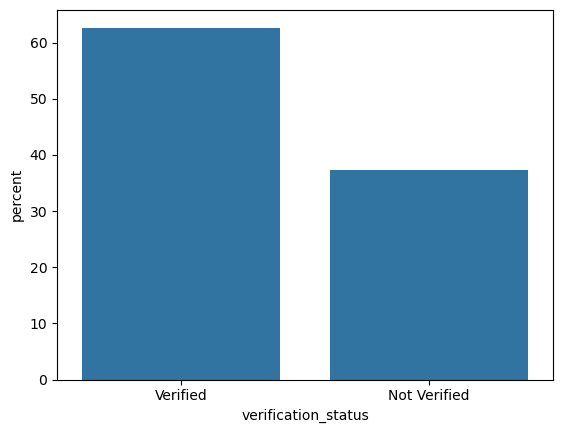

In [105]:
#Plotting verification_status
sns.countplot(data=loan_df,x='verification_status',order=loan_df.verification_status.value_counts().index,stat='percent')

Following observations have been made:
1. Verified income loans makes up for over 60% of defaulted loans.
2. 
LC needs to apply stricter methods for loan repayment capacity decisions.

##### c. Analysis of Unordered Categorical Varaible - Purpose

<Axes: xlabel='percent', ylabel='purpose'>

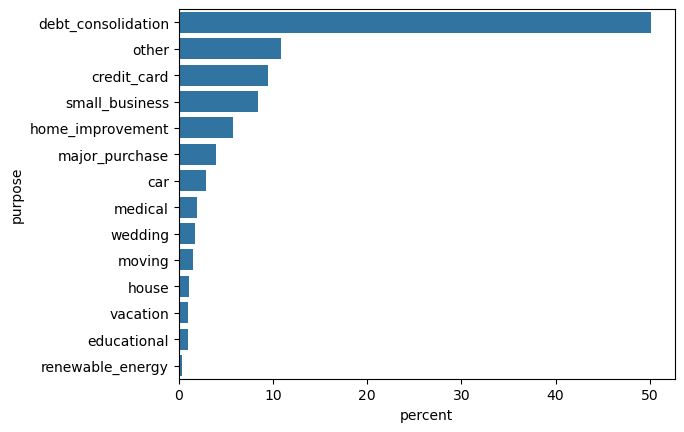

In [108]:
#plotting purpose
sns.countplot(data=loan_df,y='purpose',order=loan_df.purpose.value_counts().index,stat='percent')

Following observations have been made from purpose plotting
1. Customer who take loans for debt_consolidation are at a higher risk of defaulting as they are already under financial pressure and might not meet the commitment.

##### d. Analysis of Unordered Categorical Varaible - add_state

<Axes: xlabel='addr_state', ylabel='percent'>

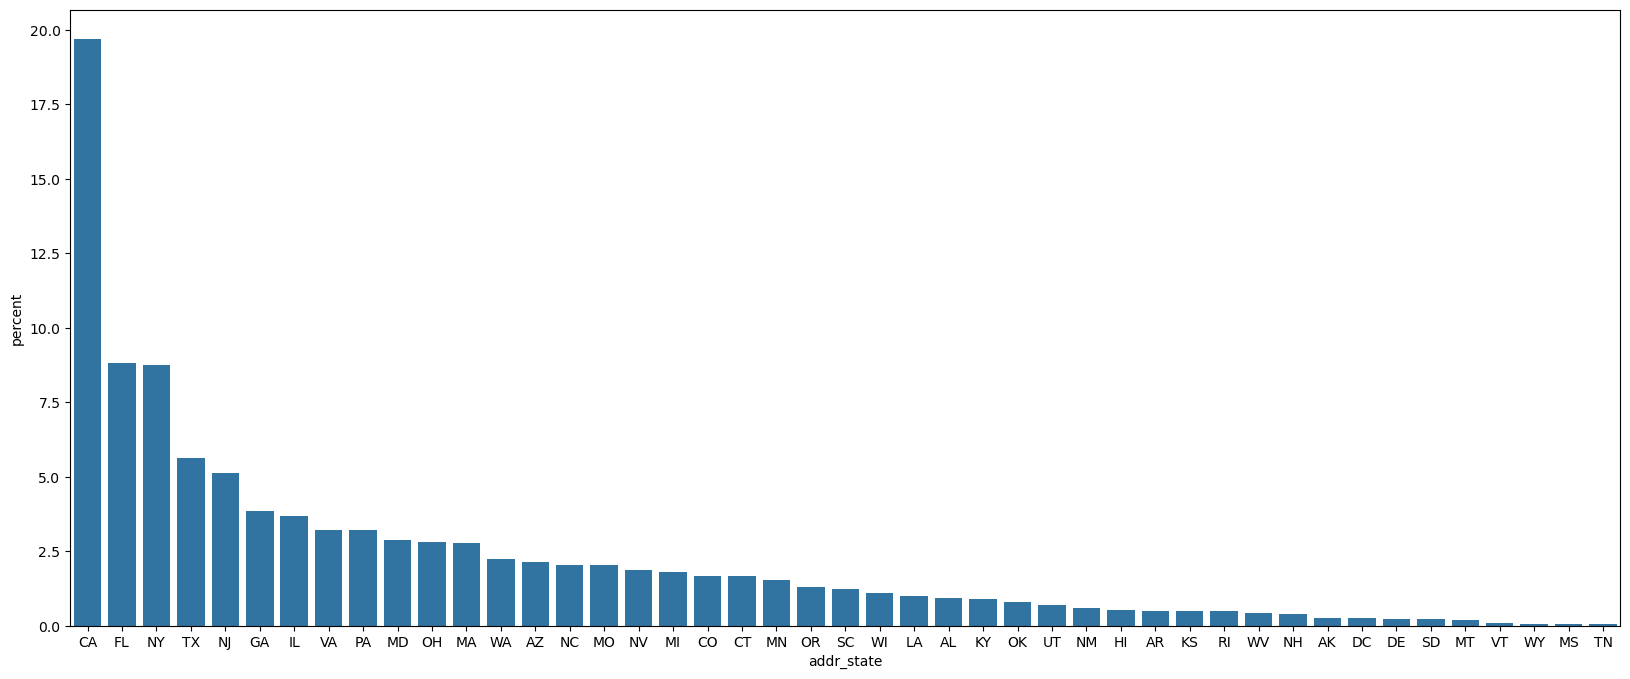

In [111]:
#Plotting add_state
fig,ax = plt.subplots(figsize=(20,8))
sns.countplot(data=loan_df,x='addr_state',order=loan_df.addr_state.value_counts().index,stat='percent')

Following observations have been made from the ablove plt
1. Most of the defaulted borrowers come from high GDP states such as California, Florida, New York, Texas and New Jersey.


##### e. Analysis of Unordered Categorical Varaible - delinq_2yrs

<Axes: xlabel='delinq_2yrs', ylabel='percent'>

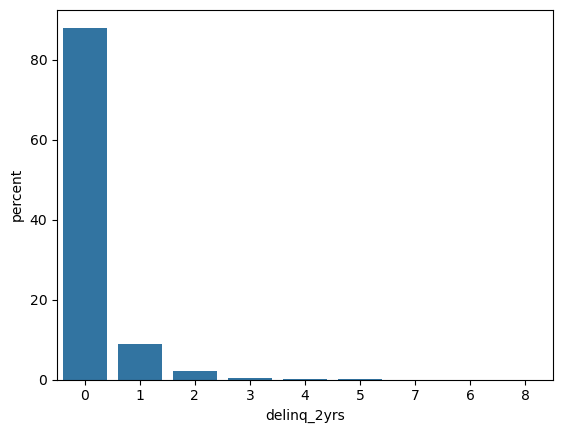

In [114]:
#Plotting delinquicies in last 2 year.
sns.countplot(data=loan_df,x='delinq_2yrs',order=loan_df.delinq_2yrs.value_counts().index,stat='percent')

Observation from above plot:
1. Customers with no past delinquicy in 2 years have higher risk of defaulting.

##### f. Analysis of Unordered Categorical Varaible - inq_last_6mths

<Axes: xlabel='inq_last_6mths', ylabel='percent'>

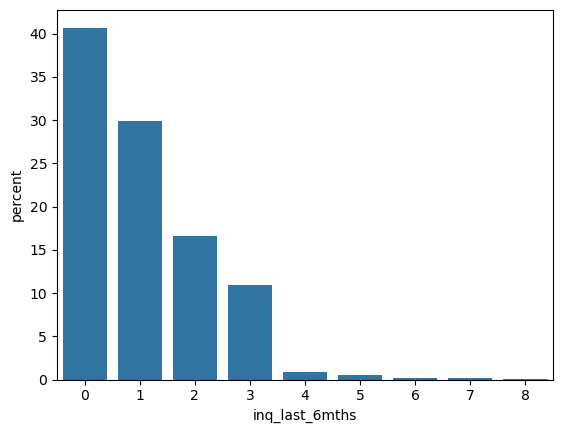

In [117]:
#plotting inquiries
sns.countplot(data=loan_df,x='inq_last_6mths',order=loan_df.inq_last_6mths.value_counts().index,stat='percent')

Observation from above plot:
1. Customers with high number of credit inquiries are less likely to default.

##### g. Analysis of Unordered Categorical Varaible - pub_rec

<Axes: xlabel='pub_rec', ylabel='percent'>

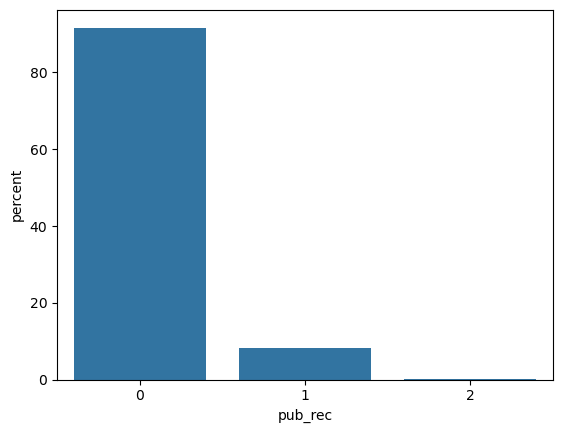

In [120]:
#Plotting pub_rec
sns.countplot(data=loan_df,x='pub_rec',order=loan_df.pub_rec.value_counts().index,stat='percent')

##### h. Analysis of Unordered Categorical Varaible - pub_rec_bankruptcies

<Axes: xlabel='pub_rec_bankruptcies', ylabel='percent'>

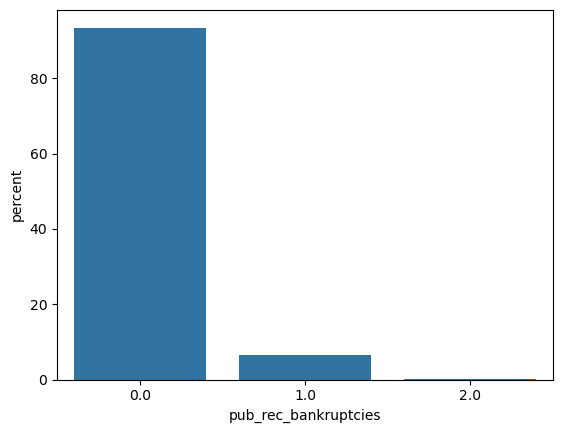

In [122]:
#plotting pub_rec_bankruptcies
sns.countplot(data=loan_df,x='pub_rec_bankruptcies',order=loan_df.pub_rec_bankruptcies.value_counts().index,stat='percent')

Following observations have been made:
1. Customer with past public deliquency record or bankruptcy records are less likely to default on loans than the customer with no past public record.
2. This might be due to the fact the customers who have public record tends to be more diligent in paying back what they owe as they are aware of the negative impact of such loans.

#### 2.2 - Quantative Variable Analysis


##### a. Analysis of Quantative Variabke Analysis - Loan amount

In [126]:
# Analyse loan amount
print(loan_df.loan_amnt.describe())
print(loan_df.funded_amnt.describe())
print(loan_df.funded_amnt_inv.describe())

count     5001.000000
mean     11904.999000
std       7879.438702
min       1000.000000
25%       5600.000000
50%      10000.000000
75%      16000.000000
max      35000.000000
Name: loan_amnt, dtype: float64
count     5001.000000
mean     11564.572086
std       7556.374824
min       1000.000000
25%       5600.000000
50%      10000.000000
75%      15875.000000
max      35000.000000
Name: funded_amnt, dtype: float64
count     5001.000000
mean     10884.850103
std       7411.614676
min          0.000000
25%       5000.000000
50%       9575.000000
75%      15000.000000
max      35000.000000
Name: funded_amnt_inv, dtype: float64


As loan_amnt, funded_amnt and funded_amnt_inv have similar min, max and distributions. So we will use loan_amnt for further analysis.

<Axes: xlabel='loan_amnt', ylabel='Count'>

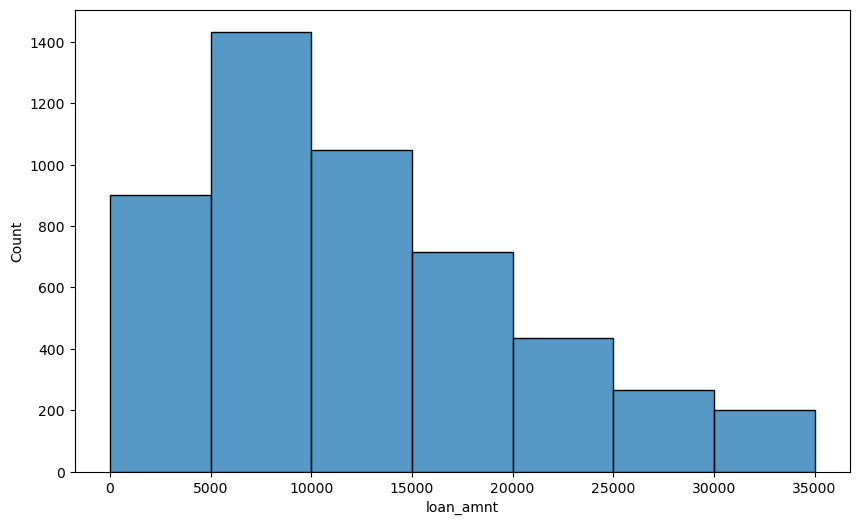

In [128]:
#plotting loan_amnt
bins = range(0,40000,5000)
plt.figure(figsize=(10,6))
sns.histplot(data=loan_df, x='loan_amnt',bins=bins)

Following observations have been made
1. Loans in the range of 5-15K are at higher risk of defaulting.
2. The loan amount for charged off loans is left skewed, meaning that borrowers who borrow smaller amounts then to default more.

##### b. Analysis of Quantative Variable Analysis - Interest Rate

In [131]:
#Analyse int_rate
loan_df.int_rate.describe()

count    5001.000000
mean       13.858008
std         3.631207
min         5.420000
25%        11.480000
50%        13.670000
75%        16.400000
max        24.400000
Name: int_rate, dtype: float64

<Axes: xlabel='int_rate', ylabel='Count'>

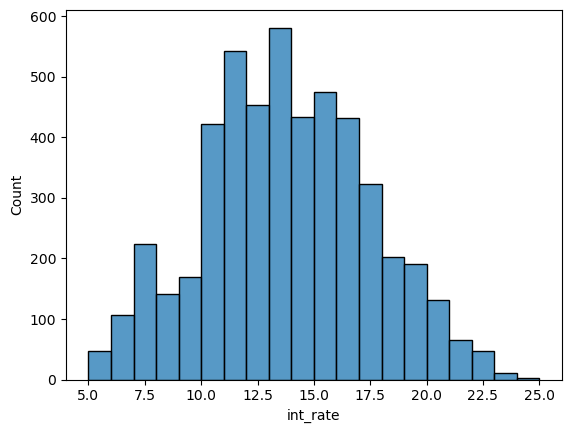

In [132]:
sns.histplot(data=loan_df, x='int_rate',bins=range(5,26))

Following observations have been made from above plot
- Maximum defaulted loans have int_rate between 10 and 17 percent.
- Loans with higher interest rate >18% have very low default rates.
- A sharp uptick in defaulted loans between int_rate 10 and 17 after which the trend seems to die down as int rate increases.

##### c. Analysis of Quantative Variable Analysis - dti

In [135]:
#analyse dti
loan_df.dti.describe()

count    5001.000000
mean       14.144663
std         6.566810
min         0.000000
25%         9.250000
50%        14.470000
75%        19.400000
max        29.850000
Name: dti, dtype: float64

<Axes: xlabel='dti', ylabel='Count'>

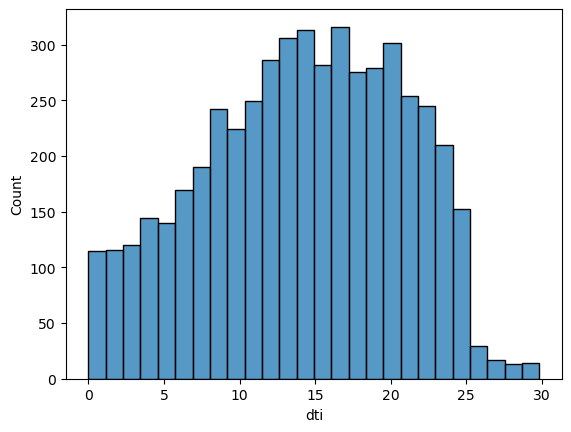

In [136]:
sns.histplot(data=loan_df,x='dti')

Following observations have been made:
1. Majority of charged off loans have a dti between 10-20%.
2. Charged off loans shows a downward trend for dti higher than 20.

##### d. Analysis of Quantative Variable Analysis - annual_inc

In [139]:
#Analyse annual_inc
loan_df.annual_inc.describe()

count      5001.000000
mean      56311.161852
std       25233.513926
min        4080.000000
25%       37000.000000
50%       52000.000000
75%       71000.000000
max      130000.000000
Name: annual_inc, dtype: float64

<Axes: xlabel='annual_inc', ylabel='Count'>

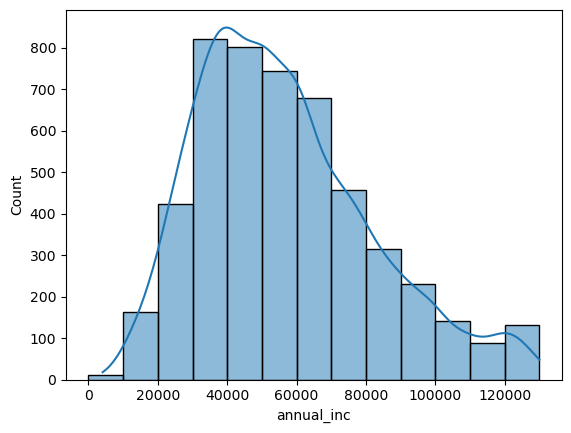

In [140]:
sns.histplot(data=loan_df,x='annual_inc',kde=True,bins=range(0,140000,10000))

Following observations have been made:
1. Majority of charged off loans are from income range 37K-70K
2. Annual income distribution is slightly left skewed with high peak. meaning lower income borrowers have a slighly high chance of defaulting.

##### e. Analysis of Quantative Variable Analysis - installment

In [143]:
#Analyse installment
loan_df.installment.describe()

count    5001.000000
mean      328.958010
std       209.115103
min        22.790000
25%       169.010000
50%       287.350000
75%       441.600000
max      1305.190000
Name: installment, dtype: float64

<Axes: xlabel='installment', ylabel='Count'>

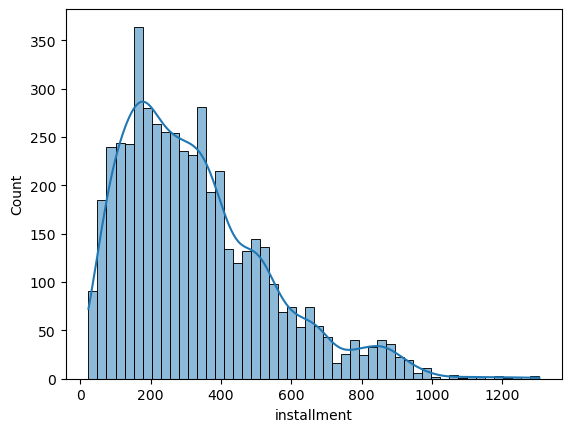

In [144]:
#Plotting Installments
sns.histplot(data=loan_df,x='installment',bins=50,kde=True)

Following observations have been made:
1. Loans with installments between 75-400 faced issues with repayment.

#### 2.2 - Bi-variate Analysis

##### 2.2.1 Defining variable pairs

As part of the analysis, let's look at below variable pairs.
- loan_amnt and int_rate
- grade and loan_amnt with subgrade
- term and loan_amnt
- emp_length and loan_amnt
- annual_inc and loan_amount
- loan_amnt and term
- home_ownership and loan_amnt
- verification_status and loan_amnt


##### a. Analysing loan amount against interest rate

<Axes: xlabel='loan_amnt', ylabel='int_rate'>

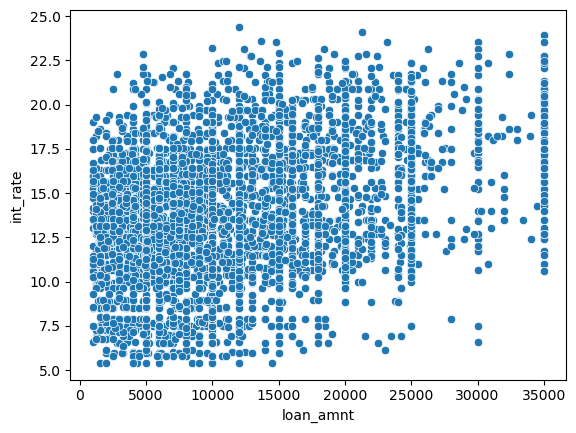

In [150]:
sns.scatterplot(data=loan_df,x='loan_amnt',y='int_rate')

- From the above scatter plot, loan amount and int_rate doesnot tell us anything.
- Only thing that we can make from this is the loan is more concentarted on left side

<Axes: xlabel='loan_amnt', ylabel='int_rate'>

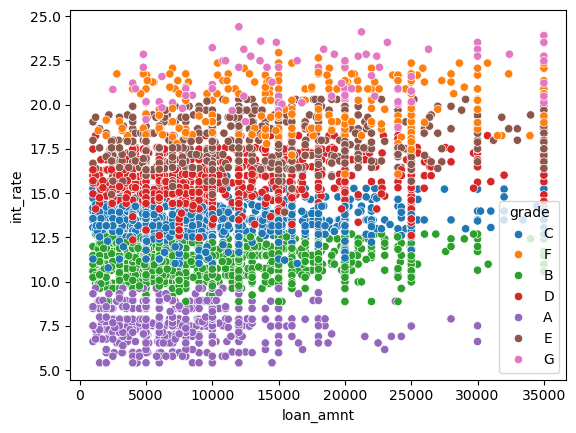

In [152]:
#plotting loan amount against interest rate with grade hue.
sns.scatterplot(data=loan_df,x='loan_amnt',y='int_rate',hue='grade')

Following observations have been made:
1. High grade loans in A,B,C tend to have lower interest rate.
2. Low grade loans which carry higher risk are offset with higher interest rate.

##### c. Analysing loan amount against grade of loans

<Axes: xlabel='grade', ylabel='loan_amnt'>

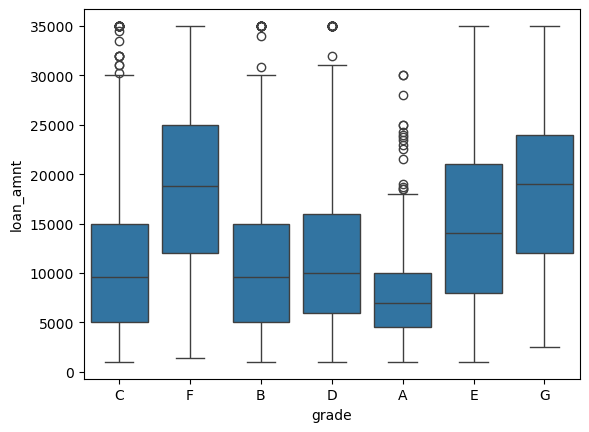

In [155]:
sns.boxplot(data=loan_df,x='grade',y='loan_amnt')


Following observations have been made from above graph:
1. Lower grade loans F,D,E and G have higher max and median values than higher grade loans A,B and C.
2. Higher loan amounts were sanctioned for lower grade loans at a higher interest rate as inferred from last plot. Increasing the risk for LC.

##### d. Analysing loan amount against loan terms

<Axes: xlabel='term', ylabel='loan_amnt'>

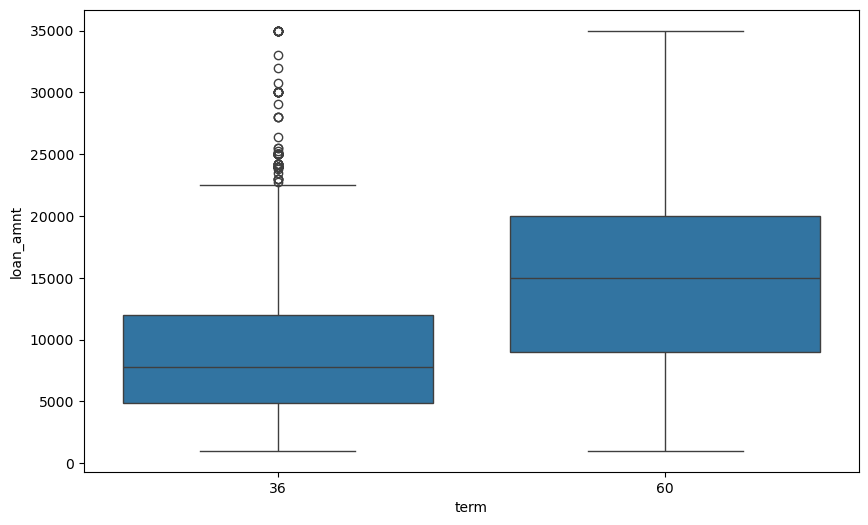

In [158]:
fig,ax = plt.subplots(figsize=(10,6))
sns.boxplot(data=loan_df,x='term',y='loan_amnt')

Following observations have been made above graph:
1. Lower term loans tend are disbursed for smaller amounts while higher terms loans have higher loan amounts.

##### e. Analysing loan amount against employment length

<Axes: xlabel='emp_length', ylabel='loan_amnt'>

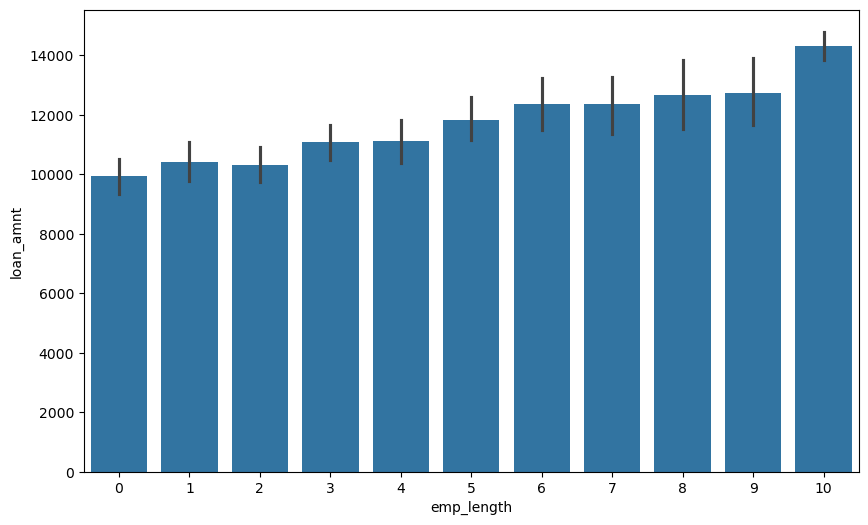

In [161]:
fig,ax = plt.subplots(figsize=(10,6))
sns.barplot(data=loan_df,x='emp_length',y='loan_amnt',order=range(0,11))

Following observations have been made from the above graph:
1. we see an upward trend in loan amount as the borrower employment length grows.
2. This could be due to increasing financial stability and employees starting to settle in their personal lives.

##### g. Analysing loan amount against purpose of loan

<Axes: xlabel='purpose', ylabel='loan_amnt'>

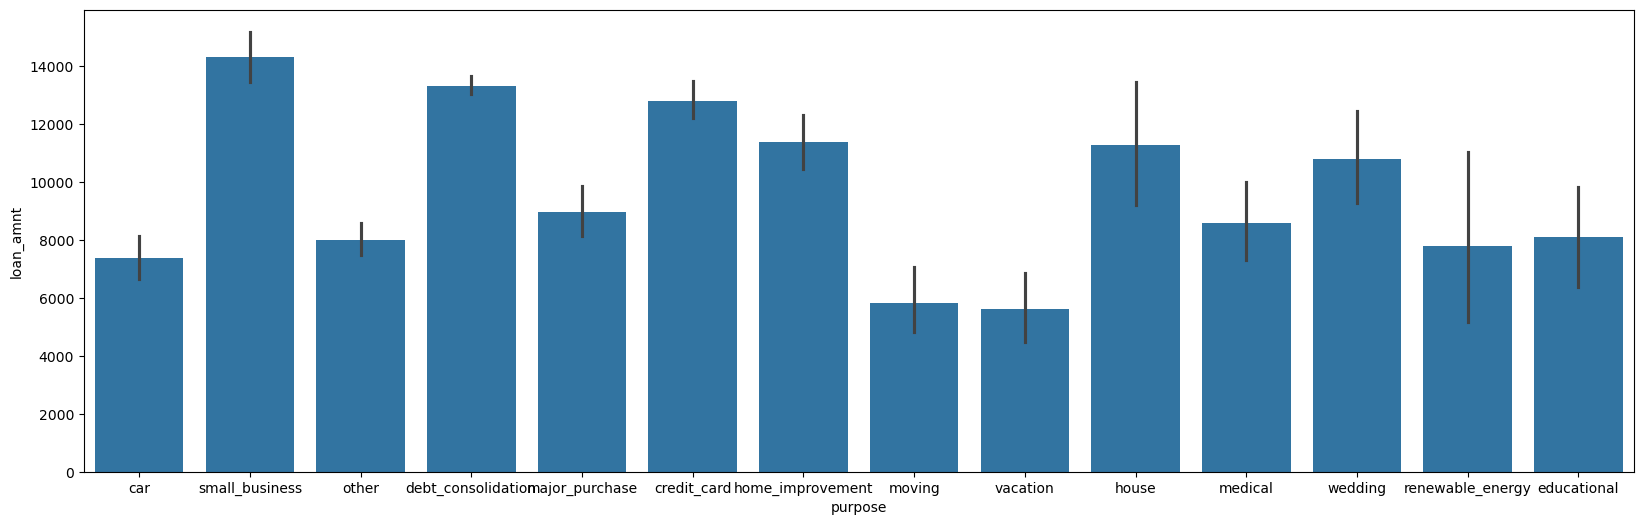

In [164]:
fig,ax = plt.subplots(figsize=(20,6))
sns.barplot(data=loan_df,x='purpose',y='loan_amnt')

Following observations have been made from above graph
1. Most high value loans are sanctioned for Small Business, followed by debt consolidation, house, home_improvement and wedding

##### h. Analysing loan amount against annual income

<Axes: xlabel='annual_inc', ylabel='loan_amnt'>

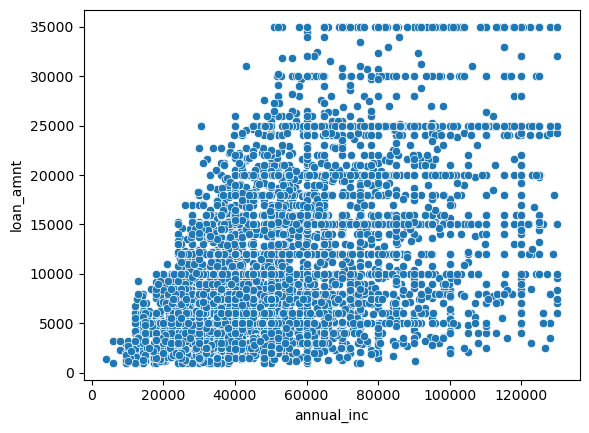

In [167]:
sns.scatterplot(data=loan_df,x='annual_inc',y='loan_amnt')

Following observations have been made from the above 
1. Most of the loans are concentrated in the lower left and gradually scatter to up-right.
2. Most  defaulted loans are taken for smaller amounts and by people with lower income.

##### i. Analysing loan amount against income verification status

<Axes: xlabel='verification_status', ylabel='loan_amnt'>

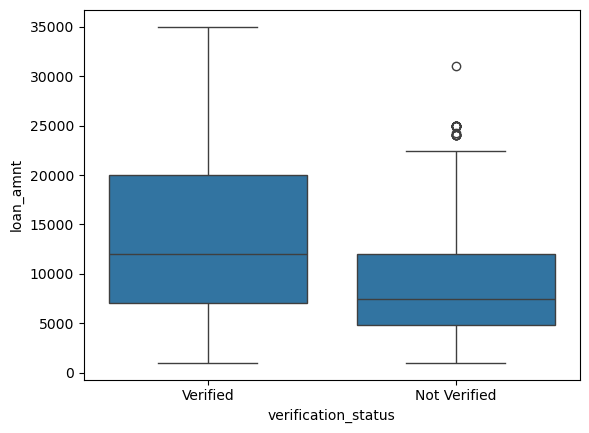

In [170]:
sns.boxplot(data=loan_df,x='verification_status',y='loan_amnt')

Following observations have been made from above:
1. Higher loan amounts are sanctioned for verified income status.
2. Tthere are some outlier in the not verified but looks like smaller loan amount are either not verified or rejected for which data is not available.

##### j. Analysing loan amount against home ownership status

<Axes: xlabel='home_ownership', ylabel='loan_amnt'>

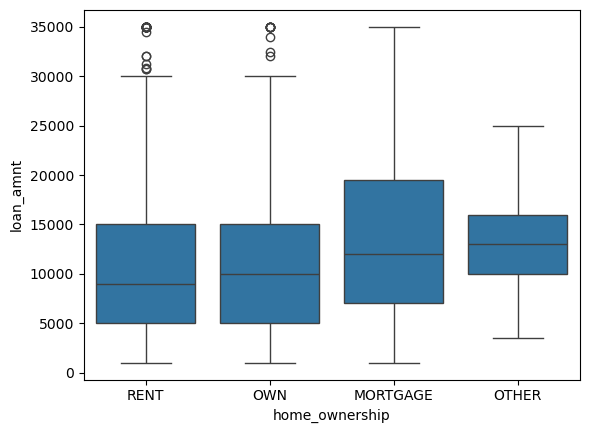

In [173]:
sns.boxplot(data=loan_df,x='home_ownership',y='loan_amnt')

Following have been observed from the above plot
1. People who are on rent or have own houses have similar loan requirement.
2. People who have mortgages tend to go for higher loan amounts which could be explained by their higher financial responsibilities.

#### 3. Correlation Analysis


<Axes: >

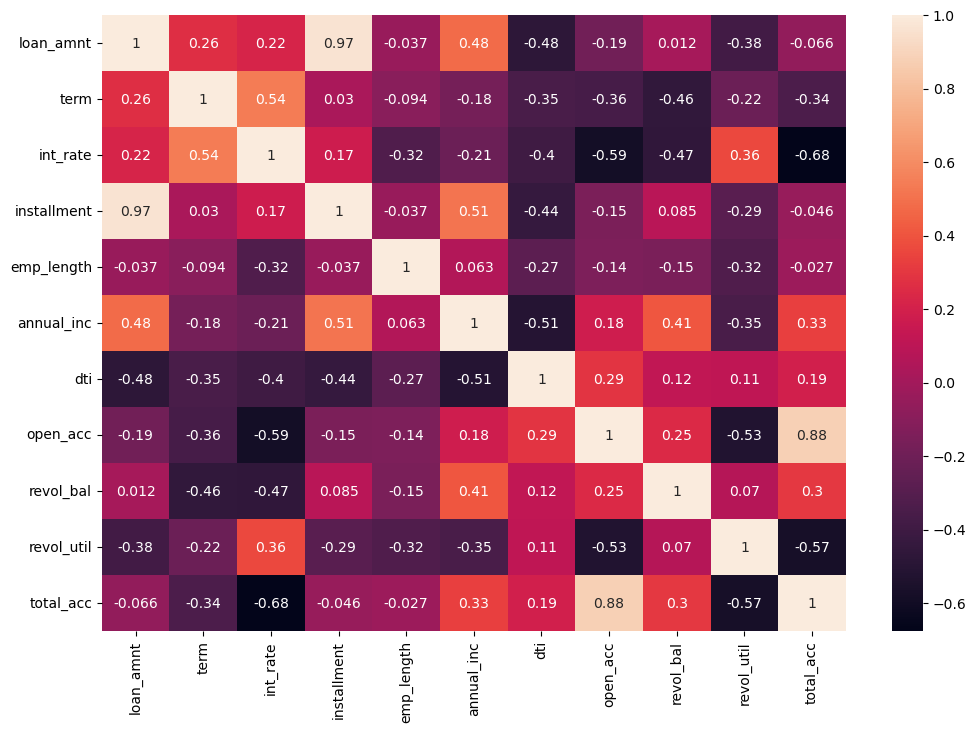

In [176]:
df_corr = loan_df.copy()
df_corr= df_corr.drop(['funded_amnt','funded_amnt_inv','loan_status','zip_code','delinq_2yrs','sub_grade','inq_last_6mths','pub_rec','pub_rec_bankruptcies','issue_d_y','issue_d_m','earliest_cr_line_y','earliest_cr_line_m'],axis=1)
df_corr=df_corr.drop(['grade','home_ownership','verification_status','issue_d','purpose','addr_state','earliest_cr_line'],axis=1)
#df_corr.dtypes
df_corr=df_corr.corr()
cmap = sns.cm.rocket
plt.figure(figsize=(12,8))
sns.heatmap(df_corr.corr(),annot=True,cmap=cmap)

##### Correlation Analysis
1. The installment amount increases with the loan amount.
2. Open accounts and total accounts are also posively correlated.
3. Loan Term is positively correlated with loan amount, annual income and interest rate.
4. People with high annual income tend to go for higher installments and longer term loans.
5. Laon amount is wealy correlated with employment length.